In [1]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
import numpy as np
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from tqdm import tqdm
import warnings
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedKFold
sns.set(font='NaNumBarunGothic')
%matplotlib inline
pd.options.display.max_columns = None # 모든 컬럼 볼 수 있게끔
# 경고 끄기
warnings.filterwarnings(action='ignore')

In [3]:
final_df = pd.read_csv("C:\\Users\kimhongbum\PycharmProjects\\numble\data\\baseline\평균으로크롤링채운거최종.csv")

In [4]:
final_df.head(3)

,BIZ_NO,CMP_NM,BZ_TYP,CMP_SCL,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,LIST_CD,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,휴폐업_여부,(주)여부,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,영업이익（손실）,법인세비용차감전순손익,법인세비용,당기순이익(손실),기업순이익률(%),유보액/총자산(%),유보액/납입자본(%),매출액총이익률(%),매출액영업이익률(%),매출액순이익률(%),수지비율(%),경상수지비율,영업비율(%),금융비용대매출액비율(%,금융비용대부채비율(%),금융비용대총비용비율(%,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),유동부채비율(%),비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,K_score,K_부실여부판단,연월,환율,CD91일,콜금리,국고채3년,회사채3년,WTi,Brent,Dubai,BDI,Corn_price,Soybean_price,Wheat_price,Food_Price_Index,Sugar_price,Cotton_price,gold_price,silver_price,avg_wage,avg_wage_percent,total_employee,turnover_rate,turnover_rate_ranking,employee_growth_rate,employee_growth_rate_ranking
0,1138111739,한일가스산업,M,2,1,N,N,0,47712.0,N,31363,1,0,LP Gas 충전 및 판매업,etc,1,홍순철외 1명,43.0,0,1,20211231,2758846.0,1577971.0,11235042.0,5705994.0,13993889.0,6172590.0,6343124.0,12515714.0,300000.0,1178175.0,1478175.0,19738142.0,5176975.0,-979131.0,-812712.0,-812712.0,1.000000e+12,8.419,392.725,21.268,-4.961,-4.118,104.027,-2099711.928,104.961,0.323,1.000000e+12,0.303,846.700,24.165,10.563,-24.395,417.582,429.119,63.409,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,100333.000,15540298.0,25000.0,59170.0,3.012498e+06,91.793878,안전기업,2021-12,1183.480442,1.272174,1.022174,1.795652,2.404783,71.781304,74.803913,73.257391,2832.111111,0.320083,0.739519,0.338347,133.7,19.146818,108.876667,1788.633333,22.468095,2861.000000,78.00000,18.000000,26.000000,17.000000,5.000000,100.000000
1,2078132193,엠피아이,M,2,1,N,N,0,etc,N,31363,1,0,가죽 및 대용가죽제품 제조업,etc,1,이스테판상수외 1명,35.0,0,1,20211231,5562280.0,1443248.0,8236579.0,4351158.0,13798860.0,5247799.0,4002659.0,9250457.0,100000.0,4448402.0,4548402.0,14889722.0,765533.0,452145.0,391144.0,13605.0,3.775390e+05,3.881,32.238,4448.402,8.178,3.037,2.536,97.398,-1352845.013,96.963,1.076000e+00,1.687,1.094,203.378,40.451,32.962,2.279,115.377,88.001,6.212700e+01,1.074000e+00,5.800000e+00,1.114000e+01,12.710,429334.0,13672044.0,208.0,2.324076e+06,11.838342,안전기업,2021-12,1183.480442,1.272174,1.022174,1.795652,2.404783,71.781304,74.803913,73.257391,2832.111111,0.320083,0.739519,0.338347,133.7,19.146818,108.876667,1788.633333,22.468095,2618.076201,82.77871,28.742563,59.190483,55.080538,47.626773,59.519504
2,1318167565,도영운수,M,2,1,N,N,0,49212.0,N,31363,1,0,시내버스업,etc,1,김명화,149.0,0,1,20211231,1965055.0,1389692.0,4358581.0,4232380.0,6323635.0,3749079.0,1024357.0,4773436.0,200000.0,1350200.0,1550200.0,12582033.0,897080.0,-20771.0,-482373.0,37794.0,-4.823730e+05,-6.641,21.352,675.100,6.965,-0.165,-3.834,103.824,1595.847,100.165,3.830000e-01,1.016,0.368,307.924,23.993,24.514,-28.212,241.845,66.079,3.793900e+01,1.925000e+00,1.000000e+12,9.850000e+00,67.045,520.0,11705724.0,917.0,3.012498e+06,10.720871,안전기업,2021-12,1183.480442,1.272174,1.022174,1.795652,2.404783,71.781304,74.803913,73.257391,2832.111111,0.320083,0.739519,0.338347,133.7,19.146818,108.876667,1788.633333,22.468095,1953.000000,100.00000,3.000000,59.190483,55.080538,47.626773,59.519504


In [10]:
# 의미가 없는 column들은 drop 처리
# BIZ_NO : 사업자 등록 번호
# BZ_TYP : 업종 -> 천개정도의 데이터를 제외하고 대다수가 M을 나타냄
# IND_CD1 : 업종코드이지만 범주가 645개로 매우 다양하고 숫자로 매핑 되어 있음 -> 수치값에 혼동을 줄 수 있으므로 드랍함 -> 추후 조치가 필요함
# HDOF_CMP_CD : 본점기업코드 : 26개의 Lable로 구성되어 있음 -> 이를 어떻게 처리 할것인지 알아볼 필요 있음, 따라서 별도의 조치는 취하지 않음!

# FR_INST_CORP_YN : 해외법인 투자여부(429개) -> 인코딩 필요
# MDSCO_PRTC_YN : 중소기업보호여부(274개) -> 인코딩 필요
tmp = final_df.drop(columns = ["BIZ_NO", "BZ_TYP", "IND_CD1", "HDOF_CMP_CD","CMP_NM", "MN_BIZ_CONT", "CEO_NM", "FR_IVST_CORP_YN", "VENT_YN", "MDSCO_PRTC_YN", "NATN_NM", "K_부실여부판단",  "결산년월", "연월"])

In [11]:
tmp.isna().sum().sum()

0

In [12]:
tmp.head(3)

,CMP_SCL,HDOF_BR_GB,LIST_CD,ESTB_GB,LIST_DATE,HOMEPAGE_URL,EMP_CNT,휴폐업_여부,(주)여부,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,영업이익（손실）,법인세비용차감전순손익,법인세비용,당기순이익(손실),기업순이익률(%),유보액/총자산(%),유보액/납입자본(%),매출액총이익률(%),매출액영업이익률(%),매출액순이익률(%),수지비율(%),경상수지비율,영업비율(%),금융비용대매출액비율(%,금융비용대부채비율(%),금융비용대총비용비율(%,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),유동부채비율(%),비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,K_score,환율,CD91일,콜금리,국고채3년,회사채3년,WTi,Brent,Dubai,BDI,Corn_price,Soybean_price,Wheat_price,Food_Price_Index,Sugar_price,Cotton_price,gold_price,silver_price,avg_wage,avg_wage_percent,total_employee,turnover_rate,turnover_rate_ranking,employee_growth_rate,employee_growth_rate_ranking
0,2,1,0,1,0,1,43.0,0,1,2758846.0,1577971.0,11235042.0,5705994.0,13993889.0,6172590.0,6343124.0,12515714.0,300000.0,1178175.0,1478175.0,19738142.0,5176975.0,-979131.0,-812712.0,-812712.0,1.000000e+12,8.419,392.725,21.268,-4.961,-4.118,104.027,-2099711.928,104.961,0.323,1.000000e+12,0.303,846.700,24.165,10.563,-24.395,417.582,429.119,63.409,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,100333.000,15540298.0,25000.0,59170.0,3.012498e+06,91.793878,1183.480442,1.272174,1.022174,1.795652,2.404783,71.781304,74.803913,73.257391,2832.111111,0.320083,0.739519,0.338347,133.7,19.146818,108.876667,1788.633333,22.468095,2861.000000,78.00000,18.000000,26.000000,17.000000,5.000000,100.000000
1,2,1,0,1,0,1,35.0,0,1,5562280.0,1443248.0,8236579.0,4351158.0,13798860.0,5247799.0,4002659.0,9250457.0,100000.0,4448402.0,4548402.0,14889722.0,765533.0,452145.0,391144.0,13605.0,3.775390e+05,3.881,32.238,4448.402,8.178,3.037,2.536,97.398,-1352845.013,96.963,1.076000e+00,1.687,1.094,203.378,40.451,32.962,2.279,115.377,88.001,6.212700e+01,1.074000e+00,5.800000e+00,1.114000e+01,12.710,429334.0,13672044.0,208.0,2.324076e+06,11.838342,1183.480442,1.272174,1.022174,1.795652,2.404783,71.781304,74.803913,73.257391,2832.111111,0.320083,0.739519,0.338347,133.7,19.146818,108.876667,1788.633333,22.468095,2618.076201,82.77871,28.742563,59.190483,55.080538,47.626773,59.519504
2,2,1,0,1,0,1,149.0,0,1,1965055.0,1389692.0,4358581.0,4232380.0,6323635.0,3749079.0,1024357.0,4773436.0,200000.0,1350200.0,1550200.0,12582033.0,897080.0,-20771.0,-482373.0,37794.0,-4.823730e+05,-6.641,21.352,675.100,6.965,-0.165,-3.834,103.824,1595.847,100.165,3.830000e-01,1.016,0.368,307.924,23.993,24.514,-28.212,241.845,66.079,3.793900e+01,1.925000e+00,1.000000e+12,9.850000e+00,67.045,520.0,11705724.0,917.0,3.012498e+06,10.720871,1183.480442,1.272174,1.022174,1.795652,2.404783,71.781304,74.803913,73.257391,2832.111111,0.320083,0.739519,0.338347,133.7,19.146818,108.876667,1788.633333,22.468095,1953.000000,100.00000,3.000000,59.190483,55.080538,47.626773,59.519504


In [14]:
#col_names = tmp.feature_names
X = tmp.drop(columns = ["휴폐업_여부"])
Y_closing = tmp['휴폐업_여부']
X_column = X.columns

#Sampling

In [15]:
#pip install imblearn

In [16]:
from imblearn.combine import *
from imblearn.over_sampling import *
X_samp, y_samp = SMOTE(random_state=4, k_neighbors=2).fit_resample(X, Y_closing)
#X_samp, y_samp = SMOTETomek(random_state=4).fit_resample(X, Y_KOVAL)

# Scaling

In [17]:
minmax_scaler = MinMaxScaler()
minmax_scaler =minmax_scaler.fit_transform(X_samp)
data_scale = minmax_scaler
data_scale = pd.DataFrame(data_scale, columns = X_column)

In [18]:
Y_closing.value_counts()

0    28211
1     6672
Name: 휴폐업_여부, dtype: int64

# MODELING

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_closing = le.fit_transform(y_samp)
Y_closing = pd.DataFrame(Y_closing)

In [ ]:
import xgboost
from xgboost import plot_importance

#model
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

import warnings
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

model1 = XGBClassifier()

# Kfold
SPLITS = 10
skf = StratifiedKFold(n_splits = SPLITS)
n_iter = 0

features = data_scale
label = Y_closing


score_acc_list = []
score_f1_micro_list = []
score_f1_macro_list = []
recall_score_list = []
precision_score_list = []
auprc_list = []

for train_idx, test_idx in skf.split(features, label):
  n_iter += 1
  print(f'--------------------{n_iter}번째 KFold-------------------')
  print(f'train_idx_len : {len(train_idx)} / test_idx_len : {len(test_idx)}')

  label_train = label.iloc[train_idx]
  label_test = label.iloc[test_idx]

  X_train, X_test = features.iloc[train_idx, :], features.iloc[test_idx, :]
  y_train, y_test = label.iloc[train_idx,:], label.iloc[test_idx,:]

  model1.fit(X_train, y_train)
  preds = model1.predict(X_test)

  print(classification_report(y_test, preds))
  print(multilabel_confusion_matrix(y_test, preds))

  score = accuracy_score(y_test, preds)
  recall = recall_score(y_test, preds)
  precision = precision_score(y_test, preds)
  auprc = average_precision_score(y_test, preds)


  score_f1_macro = f1_score(y_test, preds, average='macro')
  score_f1_micro = f1_score(y_test, preds, average='micro')
  #print(n_iter, confusion_matrix(y_test, preds))

  #print(f'{n_iter}번째 단일 accuracy_score:{score}')
  score_acc_list.append(score)
  score_f1_macro_list.append(score_f1_macro)
  score_f1_micro_list.append(score_f1_micro)
  recall_score_list.append(recall)
  precision_score_list.append(precision)
  auprc_list.append(auprc)

print('======================================================')
print(f'최종 평균 accuracy_socre : {sum(score_acc_list)/len(score_acc_list)}')
print(f'최종 평균 recall_score : {sum(recall_score_list)/len(recall_score_list)}')
print(f'최종 평균 precision_score : {sum(precision_score_list)/len(precision_score_list)}')
print(f'최종 평균 AUPRC : {sum(auprc_list)/len(auprc_list)}')
print(f'최종 평균 f1_score_macro : {sum(score_f1_macro_list)/len(score_f1_macro_list)}')
print(f'최종 평균 f1_score_micro : {sum(score_f1_micro_list)/len(score_f1_micro_list)}')
print('roc_auc_score', roc_auc_score(y_test, model1.predict_proba(X_test)[:,1], average = 'micro'))

--------------------1번째 KFold-------------------
train_idx_len : 50779 / test_idx_len : 5643
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2822
           1       0.99      0.86      0.92      2821

    accuracy                           0.93      5643
   macro avg       0.93      0.93      0.93      5643
weighted avg       0.93      0.93      0.93      5643

[[[2423  398]
  [  23 2799]]

 [[2799   23]
  [ 398 2423]]]
--------------------2번째 KFold-------------------
train_idx_len : 50779 / test_idx_len : 5643
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2821
           1       0.99      0.91      0.95      2822

    accuracy                           0.95      5643
   macro avg       0.95      0.95      0.95      5643
weighted avg       0.95      0.95      0.95      5643

[[[2572  250]
  [  29 2792]]

 [[2792   29]
  [ 250 2572]]]
--------------------3번째 KFold-----------

# 변수 중요도

In [115]:
#한글 출력을 위한 글꼴 설정 변경
plt.rcParams['font.family'] = 'Malgun Gothic'

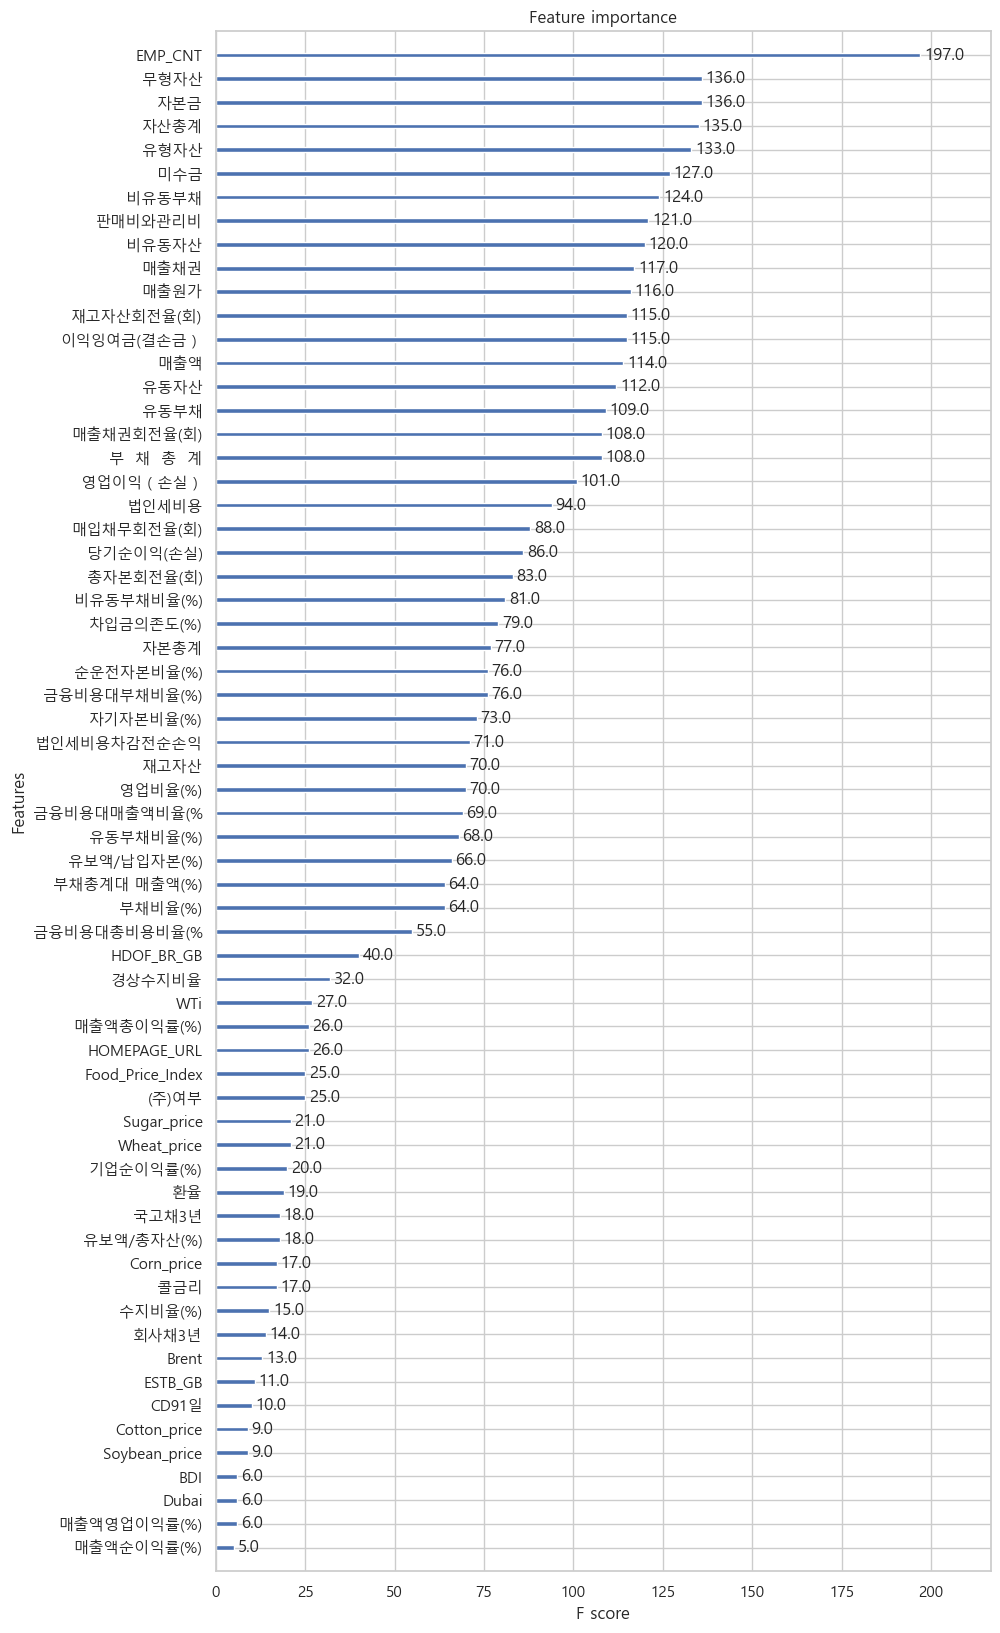

In [116]:
fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(model1, ax=ax)
plt.show()

In [117]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(X_train)

In [118]:
#force_plot
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :])

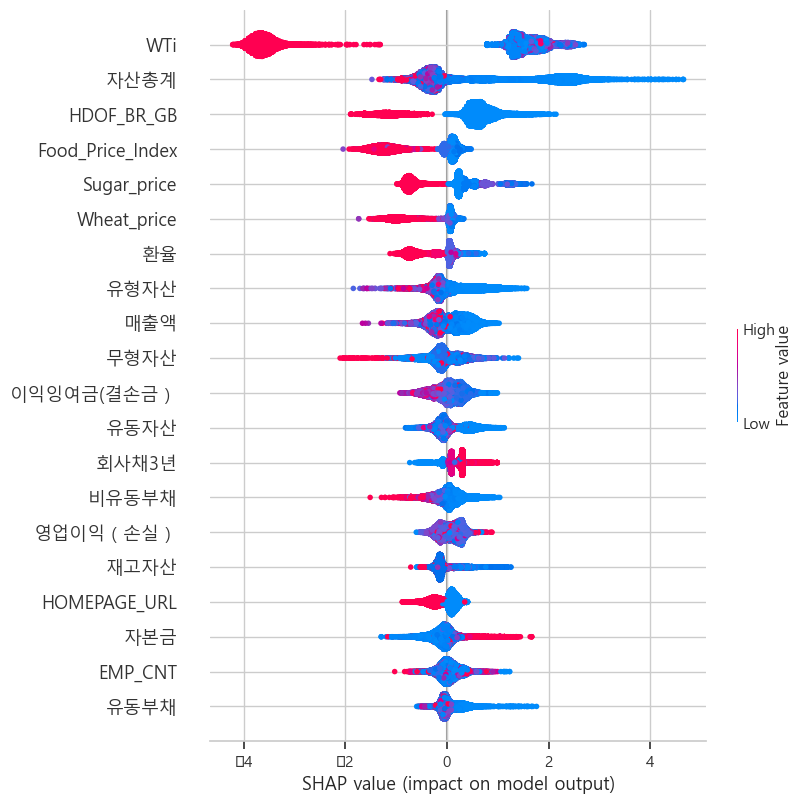

In [119]:
shap.summary_plot(shap_values, X_train)

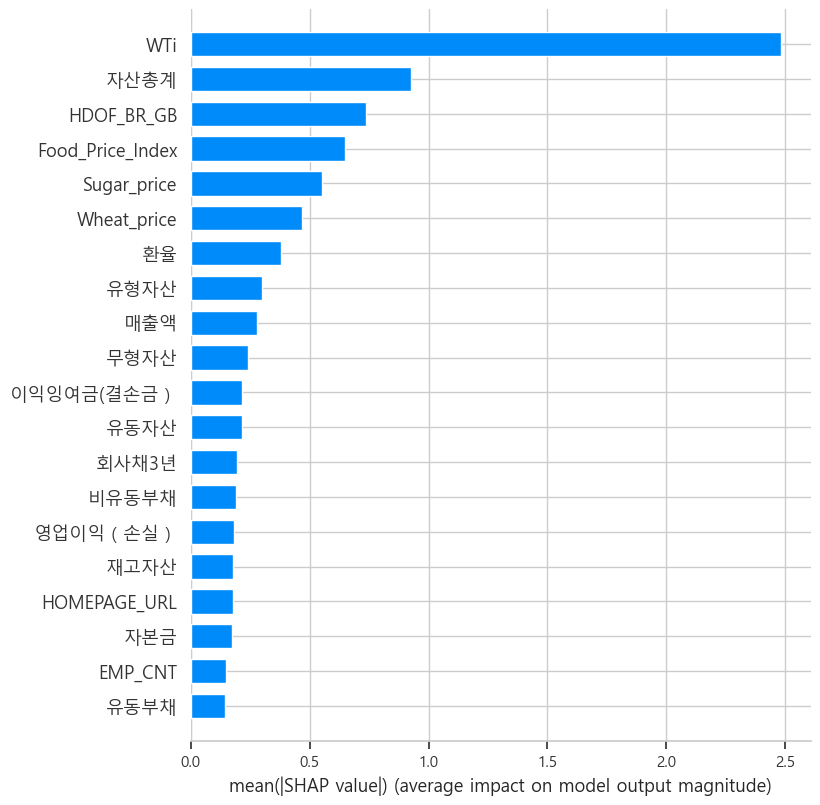

In [120]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

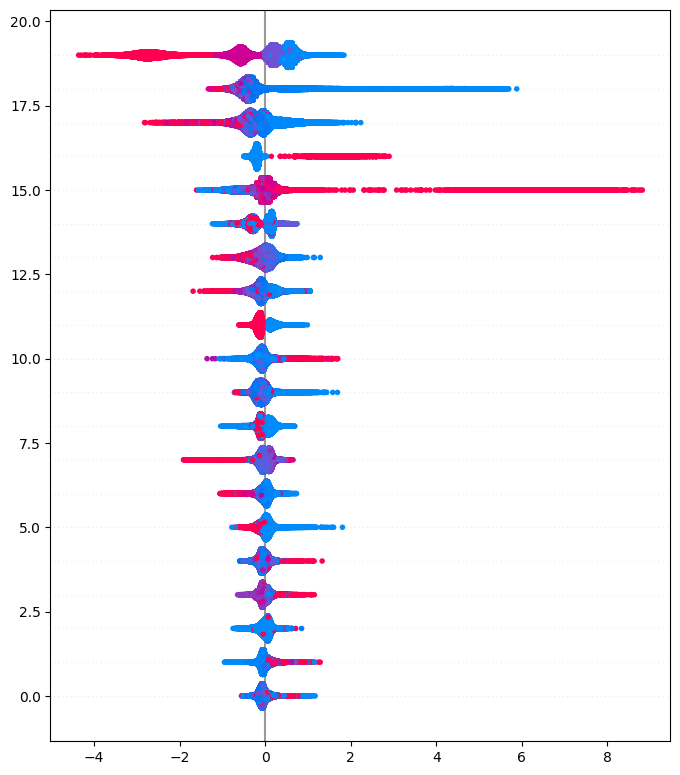

In [50]:
import shap

# Generate the Tree explainer and SHAP values
explainer = shap.Explainer(model1)
shap_values = explainer.shap_values(X_train)

#shap_values = explainer.shap_values(data_scale)
expected_value = explainer.expected_value

############## visualizations #############

##SHAP Feature Importance Plot
#shap.plots.bar(shap_values)
# Generate summary dot plot
shap.summary_plot(shap_values, X_train ,title="SHAP summary plot")

# Generate summary bar plot
shap.summary_plot(shap_values, X_train,plot_type="bar")

# Generate waterfall plot
# 특정 환자가 예측된 근거를 보여주는 플롯
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[5], features=X_train.loc[5,:], feature_names=X_train.columns, max_display=15, show=True)

# Generate dependence plot
# 두 퓨처 사이의 영향력 시각화
#shap.dependence_plot(("congestive heart failure"), shap_values, X_train, interaction_index="V02MAX")

# Generate multiple dependence plots
#for name in X_train.columns:
#     shap.dependence_plot(name, shap_values, X_train)
#shap.dependence_plot("congestive heart failure", shap_values, X_train, interaction_index="V02MAX")

# Generate force plot - Multiple rows
#특정 범위 데이터의 shapley value 출력
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_train.iloc[:100,:])

# Generate force plot - Single
#shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

# Generate Decision plot
shap.decision_plot(expected_value, shap_values[5],link='logit' ,features=X.loc[5,:], feature_names=(X_train.columns.tolist()),show=True,title="Decision Plot")